In [4]:
# install package for BIC
!pip install RegscorePy

In [5]:
!pip install lifelines

     |████████████████████████████████| 389kB 2.8MB/s 


In [0]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [0]:
# Set up data folder
from pathlib import Path
DATA = Path('/content/drive/My Drive/project/data')

# Training data

The following is commented out because mutation matrix csv has been generated. So we only need to read it in afterwards.

In [0]:
# tcga = pd.read_excel(DATA/'TCGA_LUAD.xlsx', header=1)
# tcga.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_file,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,Genome_Change,Annotation_Transcript,Transcript_Strand,Transcript_Exon,Transcript_Position,cDNA_Change,Codon_Change,Protein_Change,Other_Transcripts,Refseq_mRNA_Id,Refseq_prot_Id,SwissProt_acc_Id,SwissProt_entry_Id,Description,UniProt_AApos,UniProt_Region,UniProt_Site,UniProt_Natural_Variations,UniProt_Experimental_Info,GO_Biological_Process,GO_Cellular_Component,GO_Molecular_Function,COSMIC_overlapping_mutations,COSMIC_fusion_genes,COSMIC_tissue_types_affected,COSMIC_total_alterations_in_gene,Tumorscape_Amplification_Peaks,Tumorscape_Deletion_Peaks,TCGAscape_Amplification_Peaks,TCGAscape_Deletion_Peaks,DrugBank,ref_context,gc_content,ACHILLES_Top_Genes,CCLE_ONCOMAP_overlapping_mutations,CCLE_ONCOMAP_total_mutations_in_gene,CGC_Mutation_Type,CGC_Translocation_Partner,CGC_Tumor_Types_Somatic,CGC_Tumor_Types_Germline,CGC_Other_Diseases,DNARepairGenes_Role,FamilialCancerDatabase_Syndromes,MUTSIG_Published_Results,OREGANNO_ID,OREGANNO_Values,t_alt_count,t_ref_count,validation_status,validation_method,validation_tumor_sample,validation_alt_allele,pox,qox,pox_cutoff,isArtifactMode,oxoGCut
0,PLEKHN1,84069,broad.mit.edu,37,1,905907,905907,+,Missense_Mutation,SNP,A,A,T,NaN,NaN,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4249-10A-01D-1105-08,A,A,-,-,A,A,Unknown,Untested,Somatic,Unspecified,WXS,none,NaN,NaN,Illumina HiSeq,8be717b5-5b65-4631-a175-1f4c063d447e,5d48c4d0-e1bd-4a65-9ecf-b6bad02196d7,g.chr1:905907A>T,uc001ace.2,+,4,372,c.337A>T,c.(337-339)AGC>TGC,p.S113C,PLEKHN1_uc001acd.2_Missense_Mutation_p.S113C|P...,NM_032129,NP_115505,Q494U1,PKHN1_HUMAN,"pleckstrin homology domain containing, family N",113,PH 1.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,all_cancers(77;0.00164)|all_epithelial(69;0.00...,all_epithelial(116;9.48e-15)|all_lung(118;9.67...,NaN,UCEC - Uterine corpus endometrioid carcinoma (...,NaN,GCAGGATGTCAGCGACTGCTA,0.672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,54,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.009535,0.0,0.0
1,UBE2J2,118424,broad.mit.edu,37,1,1192480,1192480,+,Silent,SNP,C,C,A,NaN,NaN,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4249-10A-01D-1105-08,C,C,-,-,C,C,Unknown,Untested,Somatic,Unspecified,WXS,none,NaN,NaN,Illumina HiSeq,8be717b5-5b65-4631-a175-1f4c063d447e,5d48c4d0-e1bd-4a65-9ecf-b6bad02196d7,g.chr1:1192480C>A,uc001adn.2,-,5,616,c.306G>T,c.(304-306)CCG>CCT,p.P102P,UBE2J2_uc001adm.2_Silent_p.P67P|UBE2J2_uc001ad...,NM_194458,NP_919440,Q8N2K1,UB2J2_HUMAN,"ubiquitin conjugating enzyme E2, J2 isoform 3",102,Cytoplasmic (Potential).,NaN,NaN,NaN,response to unfolded protein,endoplasmic reticulum membrane|integral to mem...,ATP binding|ubiquitin-protein ligase activity,NaN,NaN,NaN,0.0,all_cancers(77;0.00164)|all_epithelial(69;0.00...,all_epithelial(116;8.75e-19)|all_lung(118;2.3e...,NaN,Epithelial(90;6.66e-35)|OV - Ovarian serous cy...,NaN,TCCACGTGTCCGGGTGGAAAT,0.642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,145,NaN,NaN,NaN,NaN,2.375320e-16,3.325450e-16,0.014410,1.0,0.0
2,Unknown,0,broad.mit.edu,37,1,1854885,1854885,+,Missense_Mutation,SNP,G,G,C,NaN,NaN,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4249-10A-01D-1105-08,G,G,-,-,G,G,Unknown,Untested,Somatic,Unspecified,WXS,none,NaN,NaN,Illumina HiSeq,8be717b5-5b65-4631-a175-1f4c063d447e,5d48c4d0-e1bd-4a65-9ecf-b6bad02196d7,g.chr1:1854885G>C,uc001aik.2,-,8,1291,c.441C>G,c.(439-441)TTC>TTG,p.F147L,uc001ail.2_Missense_Mutation_p.F147L,NaN,NaN,NaN,NaN,RecName: Full=Uncharacterized protein C1

In [0]:
# tcga.Variant_Classification.unique()

array(['Missense_Mutation', 'Silent', 'Nonsense_Mutation', 'Splice_Site',
       'Translation_Start_Site', 'Nonstop_Mutation', 'Frame_Shift_Del',
       'Frame_Shift_Ins', 'In_Frame_Del', 'In_Frame_Ins'], dtype=object)

In [0]:
# tcga.Variant_Type.unique()

array(['SNP', 'DNP', 'TNP', 'DEL', 'INS'], dtype=object)

# Selection of nonsynonymous point mutations and the construction of mutation matrix

## Selection of nonsynonymous point mutations

“Variant_Classification”: select nonsense mutation, nonstop mutation, and missense mutation. 

In [0]:
# nonsyn = tcga[tcga['Variant_Classification'].isin([ 'Nonsense_Mutation', 'Nonstop_Mutation', 'Missense_Mutation'])]

In [0]:
# nonsyn['Variant_Classification'].unique()

array(['Missense_Mutation', 'Nonsense_Mutation', 'Nonstop_Mutation'],
      dtype=object)

## Construction of mutation matrix

"Variant_Type": select SNP, DNP, and TNP (polymorphysm). The mutation counts are 1, 2, and 3, respectively.

In [0]:
# poly = nonsyn[nonsyn['Variant_Type'].isin(['SNP', 'DNP', 'TNP'])]
# poly.Variant_Type.unique()

array(['SNP', 'DNP', 'TNP'], dtype=object)

In [0]:
# poly.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_file,Sequencer,Tumor_Sample_UUID,Matched_Norm_Sample_UUID,Genome_Change,Annotation_Transcript,Transcript_Strand,Transcript_Exon,Transcript_Position,cDNA_Change,Codon_Change,Protein_Change,Other_Transcripts,Refseq_mRNA_Id,Refseq_prot_Id,SwissProt_acc_Id,SwissProt_entry_Id,Description,UniProt_AApos,UniProt_Region,UniProt_Site,UniProt_Natural_Variations,UniProt_Experimental_Info,GO_Biological_Process,GO_Cellular_Component,GO_Molecular_Function,COSMIC_overlapping_mutations,COSMIC_fusion_genes,COSMIC_tissue_types_affected,COSMIC_total_alterations_in_gene,Tumorscape_Amplification_Peaks,Tumorscape_Deletion_Peaks,TCGAscape_Amplification_Peaks,TCGAscape_Deletion_Peaks,DrugBank,ref_context,gc_content,ACHILLES_Top_Genes,CCLE_ONCOMAP_overlapping_mutations,CCLE_ONCOMAP_total_mutations_in_gene,CGC_Mutation_Type,CGC_Translocation_Partner,CGC_Tumor_Types_Somatic,CGC_Tumor_Types_Germline,CGC_Other_Diseases,DNARepairGenes_Role,FamilialCancerDatabase_Syndromes,MUTSIG_Published_Results,OREGANNO_ID,OREGANNO_Values,t_alt_count,t_ref_count,validation_status,validation_method,validation_tumor_sample,validation_alt_allele,pox,qox,pox_cutoff,isArtifactMode,oxoGCut
0,PLEKHN1,84069,broad.mit.edu,37,1,905907,905907,+,Missense_Mutation,SNP,A,A,T,NaN,NaN,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4249-10A-01D-1105-08,A,A,-,-,A,A,Unknown,Untested,Somatic,Unspecified,WXS,none,NaN,NaN,Illumina HiSeq,8be717b5-5b65-4631-a175-1f4c063d447e,5d48c4d0-e1bd-4a65-9ecf-b6bad02196d7,g.chr1:905907A>T,uc001ace.2,+,4,372,c.337A>T,c.(337-339)AGC>TGC,p.S113C,PLEKHN1_uc001acd.2_Missense_Mutation_p.S113C|P...,NM_032129,NP_115505,Q494U1,PKHN1_HUMAN,"pleckstrin homology domain containing, family N",113,PH 1.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,all_cancers(77;0.00164)|all_epithelial(69;0.00...,all_epithelial(116;9.48e-15)|all_lung(118;9.67...,NaN,UCEC - Uterine corpus endometrioid carcinoma (...,NaN,GCAGGATGTCAGCGACTGCTA,0.672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,54,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.009535,0.0,0.0
2,Unknown,0,broad.mit.edu,37,1,1854885,1854885,+,Missense_Mutation,SNP,G,G,C,NaN,NaN,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4249-10A-01D-1105-08,G,G,-,-,G,G,Unknown,Untested,Somatic,Unspecified,WXS,none,NaN,NaN,Illumina HiSeq,8be717b5-5b65-4631-a175-1f4c063d447e,5d48c4d0-e1bd-4a65-9ecf-b6bad02196d7,g.chr1:1854885G>C,uc001aik.2,-,8,1291,c.441C>G,c.(439-441)TTC>TTG,p.F147L,uc001ail.2_Missense_Mutation_p.F147L,NaN,NaN,NaN,NaN,RecName: Full=Uncharacterized protein C1orf222;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CGCCCTCCACGAACATCATGT,0.637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,14,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.001984,0.0,0.0
3,C1orf200,644997,broad.mit.edu,37,1,9713992,9713992,+,Missense_Mutation,SNP,G,G,A,NaN,NaN,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4249-10A-01D-1105-08,G,G,-,-,G,G,Unknown,Untested,Somatic,Unspecified,WXS,none,NaN,NaN,Illumina HiSeq,8be717b5-5b65-4631-a175-1f4c063d447e,5d48c4d0-e1bd-4a65-9ecf-b6bad02196d7,g.chr1:9713992G>A,uc001aqc.3,-,2,499,c.349C>T,c.(349-351)CGC>TGC,p.R117C,PIK3CD_uc001aqa.2_Intron|PIK3CD_uc001aqb.3_Intron,NR_027045,NaN,NaN,NaN,RecName: Full=Putative uncharacterized protein...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,all_lung(157;0.222),Renal(390;0.000469)|all_lung(118;0.000521)|Lun...,NaN,UCEC - Uterine corpus endometrioid carcinoma (...,NaN,Ggctgagagcggtagctcata,0.234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,26,NaN,Na

In [0]:
# poly = poly[poly.Hugo_Symbol != 'Unknown']

In [0]:
# # create an empty mutation matrix
# col = poly['Tumor_Sample_Barcode'].unique()
# idx = poly['Hugo_Symbol'].unique()
# mutmtx = pd.DataFrame(np.zeros([len(idx), len(col)]), columns=col, index=idx)

# # fill in the mutation matrix
# vt = {'SNP': 1, 'DNP': 2, 'TNP': 3}
# for _, row in poly.iterrows():
#     mutmtx.loc[row.Hugo_Symbol, row.Tumor_Sample_Barcode] += vt[row.Variant_Type]

In [0]:
# mutmtx.shape

(13526, 230)

In [0]:
# mutmtx

,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4382-01A-01D-1265-08,TCGA-05-4384-01A-01D-1753-08,TCGA-05-4389-01A-01D-1265-08,TCGA-05-4390-01A-02D-1753-08,TCGA-05-4395-01A-01D-1265-08,TCGA-05-4396-01A-21D-1855-08,TCGA-05-4398-01A-01D-1265-08,TCGA-05-4402-01A-01D-1265-08,TCGA-05-4403-01A-01D-1265-08,TCGA-05-4405-01A-21D-1855-08,TCGA-05-4410-01A-21D-1855-08,TCGA-05-4415-01A-22D-1855-08,TCGA-05-4417-01A-22D-1855-08,TCGA-05-4418-01A-01D-1265-08,TCGA-05-4420-01A-01D-1265-08,TCGA-05-4422-01A-01D-1265-08,TCGA-05-4424-01A-22D-1855-08,TCGA-05-4425-01A-01D-1753-08,TCGA-05-4426-01A-01D-1265-08,TCGA-05-4430-01A-02D-1265-08,TCGA-05-4432-01A-01D-1265-08,TCGA-05-4433-01A-22D-1855-08,TCGA-05-5420-01A-01D-1625-08,TCGA-05-5423-01A-01D-1625-08,TCGA-05-5428-01A-01D-1625-08,TCGA-05-5429-01A-01D-1625-08,TCGA-05-5715-01A-01D-1625-08,TCGA-35-3615-01A-01D-1040-01,TCGA-38-4626-01A-01D-1553-08,TCGA-38-4627-01A-01D-1553-08,TCGA-38-4628-01A-01D-1265-08,TCGA-38-4631-01A-01D-1753-08,TCGA-38-4632-01A-01D-1753-08,TCGA-38-6178-01A-11D-1753-08,TCGA-44-2655-01A-01D-1553-08,TCGA-44-2656-01A-02W-0928-08,TCGA-44-2657-01A-01D-1105-08,TCGA-44-2659-01A-01D-0969-08,TCGA-44-2661-01A-01D-1105-08,TCGA-44-2662-01A-01D-0969-08,TCGA-44-2665-01A-01D-1040-01,TCGA-44-2666-01A-01D-1489-08,TCGA-44-3396-01A-01D-1265-08,TCGA-44-3919-01A-02D-1458-08,TCGA-44-4112-01A-01D-1105-08,TCGA-44-5645-01A-01D-1625-08,TCGA-44-6145-01A-11D-1753-08,TCGA-44-6146-01A-11D-1753-08,TCGA-44-6147-01A-11D-1753-08,TCGA-44-6774-01A-21D-1855-08,TCGA-44-6775-01A-11D-1855-08,TCGA-44-6776-01A-11D-1855-08,TCGA-44-6777-01A-11D-1855-08,TCGA-44-6779-01A-11D-1855-08,TCGA-44-7659-01A-11D-2063-08,TCGA-44-7662-01A-11D-2063-08,TCGA-44-7670-01A-11D-2063-08,TCGA-44-7671-01A-11D-2063-08,TCGA-44-7672-01A-11D-2063-08,TCGA-49-4486-01A-01D-1265-08,TCGA-49-4487-01A-21D-1855-08,TCGA-49-4488-01A-01D-1753-08,TCGA-49-4490-01A-21D-1855-08,TCGA-49-4494-01A-01D-1265-08,TCGA-49-4501-01A-01D-1265-08,TCGA-49-4505-01A-01D-1265-08,TCGA-49-4506-01A-01D-1265-08,TCGA-49-4507-01A-01D-1265-08,TCGA-49-4510-01A-01D-1265-08,TCGA-49-4512-01A-21D-1855-08,TCGA-49-4514-01A-21D-1855-08,TCGA-49-6742-01A-11D-1855-08,TCGA-49-6744-01A-11D-1855-08,TCGA-49-6745-01A-11D-1855-08,TCGA-49-6761-01A-31D-1945-08,TCGA-49-6767-01A-11D-1855-08,TCGA-50-5044-01A-21D-1855-08,TCGA-50-5049-01A-01D-1625-08,TCGA-50-5051-01A-21D-1855-08,TCGA-50-5055-01A-01D-1625-08,TCGA-50-5068-01A-01D-1625-08,TCGA-50-5072-01A-21D-1855-08,TCGA-50-5931-01A-11D-1753-08,TCGA-50-5932-01A-11D-1753-08,TCGA-50-5933-01A-11D-1753-08,TCGA-50-5935-01A-11D-1753-08,TCGA-50-5936-01A-11D-1625-08,TCGA-50-5939-01A-11D-1625-08,TCGA-50-5941-01A-11D-1753-08,TCGA-50-5942-01A-21D-1753-08,TCGA-50-5944-01A-11D-1753-08,TCGA-50-6593-01A-11D-1753-08,TCGA-50-6595-01A-12D-1855-08,TCGA-50-6597-01A-11D-1855-08,TCGA-50-6673-01A-11D-1945-08,TCGA-50-7109-01A-11D-2036-08,TCGA-53-7626-01A-12D-2063-08,TCGA-53-7813-01A-11D-2167-08,TCGA-55-1592-01A-01D-0969-08,TCGA-55-1594-01A-01D-1040-01,TCGA-55-1596-01A-01D-1040-01,TCGA-55-6543-01A-11D-1753-08,TCGA-55-6642-01A-11D-1855-08,TCGA-55-6712-01A-11D-1855-08,TCGA-55-6970-01A-11D-1945-08,TCGA-55-6971-01A-11D-1945-08,TCGA-55-6972-01A-11D-1945-08,TCGA-55-6978-01A-11D-1945-08,TCGA-55-6979-01A-11D-1945-08,TCGA-55-6980-01A-11D-1945-08,TCGA-55-6981-01A-11D-1945-08,TCGA-55-6982-01A-11D-1945-08,TCGA-55-6983-01A-11D-1945-08,TCGA-55-6985-01A-11D-1945-08,TCGA-55-6986-01A-11D-1945-08,TCGA-55-7281-01A-11D-2036-08,TCGA-55-7283-01A-11D-2036-08,TCGA-55-7573-01A-11D-2036-08,TCGA-55-7574-01A-11D-2036-08,TCGA-55-7576-01A-11D-2063-08,TCGA-55-7724-01A-11D-2167-08,TCGA-55-7725-01A-11D-2167-08,TCGA-55-7726-01A-11D-2167-08,TCGA-55-7727-01A-11D-2167-08,TCGA-55-7728-01A-11D-2184-08,TCGA-55-7815-01A-11D-2167-08,TCGA-55-7903-01A-11D-2167-08,TCGA-55-7907-01A-11D-2167-08,TCGA-55-7911-01A-11D-2167-08,TCGA-55-7914-01A-11D-2167-08,TCGA-64-1676-01A-01D-0969-08,TCGA-64-1677-01A-01W-0928-08,TCGA-64-1678-01A-01W-0928-08,TCGA-64-1679-01A-21D-2063-08,TCGA-64-1680-01A-02D-0969-08,TCGA-64-1681-01A-11D-2063-08,TCGA-64-5774-01A-01D-1625-

In [0]:
# mutmtx.to_csv(DATA/'mutmtx.csv')

This is the mutation matrix defined from the paper (13,526 genes and 230 patients). Mutation matrix has been saved to csv. Just load the csv from now on.

In [7]:
mutmtx = pd.read_csv(DATA/'mutmtx.csv', index_col=0)
# remove genes that they do not exist in validation data and otherwise would be selected
mutmtx = mutmtx.drop(['ZNF521', 'KMT2C', 'ADGRG4', 'COL6A3', 'ERICH3', 'NOTCH4', 'RIMS2'])
mutmtx.head()

,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4382-01A-01D-1265-08,TCGA-05-4384-01A-01D-1753-08,TCGA-05-4389-01A-01D-1265-08,TCGA-05-4390-01A-02D-1753-08,TCGA-05-4395-01A-01D-1265-08,TCGA-05-4396-01A-21D-1855-08,TCGA-05-4398-01A-01D-1265-08,TCGA-05-4402-01A-01D-1265-08,TCGA-05-4403-01A-01D-1265-08,TCGA-05-4405-01A-21D-1855-08,TCGA-05-4410-01A-21D-1855-08,TCGA-05-4415-01A-22D-1855-08,TCGA-05-4417-01A-22D-1855-08,TCGA-05-4418-01A-01D-1265-08,TCGA-05-4420-01A-01D-1265-08,TCGA-05-4422-01A-01D-1265-08,TCGA-05-4424-01A-22D-1855-08,TCGA-05-4425-01A-01D-1753-08,TCGA-05-4426-01A-01D-1265-08,TCGA-05-4430-01A-02D-1265-08,TCGA-05-4432-01A-01D-1265-08,TCGA-05-4433-01A-22D-1855-08,TCGA-05-5420-01A-01D-1625-08,TCGA-05-5423-01A-01D-1625-08,TCGA-05-5428-01A-01D-1625-08,TCGA-05-5429-01A-01D-1625-08,TCGA-05-5715-01A-01D-1625-08,TCGA-35-3615-01A-01D-1040-01,TCGA-38-4626-01A-01D-1553-08,TCGA-38-4627-01A-01D-1553-08,TCGA-38-4628-01A-01D-1265-08,TCGA-38-4631-01A-01D-1753-08,TCGA-38-4632-01A-01D-1753-08,TCGA-38-6178-01A-11D-1753-08,TCGA-44-2655-01A-01D-1553-08,TCGA-44-2656-01A-02W-0928-08,TCGA-44-2657-01A-01D-1105-08,TCGA-44-2659-01A-01D-0969-08,TCGA-44-2661-01A-01D-1105-08,TCGA-44-2662-01A-01D-0969-08,TCGA-44-2665-01A-01D-1040-01,TCGA-44-2666-01A-01D-1489-08,TCGA-44-3396-01A-01D-1265-08,TCGA-44-3919-01A-02D-1458-08,TCGA-44-4112-01A-01D-1105-08,TCGA-44-5645-01A-01D-1625-08,TCGA-44-6145-01A-11D-1753-08,TCGA-44-6146-01A-11D-1753-08,TCGA-44-6147-01A-11D-1753-08,TCGA-44-6774-01A-21D-1855-08,TCGA-44-6775-01A-11D-1855-08,TCGA-44-6776-01A-11D-1855-08,TCGA-44-6777-01A-11D-1855-08,TCGA-44-6779-01A-11D-1855-08,TCGA-44-7659-01A-11D-2063-08,TCGA-44-7662-01A-11D-2063-08,TCGA-44-7670-01A-11D-2063-08,TCGA-44-7671-01A-11D-2063-08,TCGA-44-7672-01A-11D-2063-08,TCGA-49-4486-01A-01D-1265-08,TCGA-49-4487-01A-21D-1855-08,TCGA-49-4488-01A-01D-1753-08,TCGA-49-4490-01A-21D-1855-08,TCGA-49-4494-01A-01D-1265-08,TCGA-49-4501-01A-01D-1265-08,TCGA-49-4505-01A-01D-1265-08,TCGA-49-4506-01A-01D-1265-08,TCGA-49-4507-01A-01D-1265-08,TCGA-49-4510-01A-01D-1265-08,TCGA-49-4512-01A-21D-1855-08,TCGA-49-4514-01A-21D-1855-08,TCGA-49-6742-01A-11D-1855-08,TCGA-49-6744-01A-11D-1855-08,TCGA-49-6745-01A-11D-1855-08,TCGA-49-6761-01A-31D-1945-08,TCGA-49-6767-01A-11D-1855-08,TCGA-50-5044-01A-21D-1855-08,TCGA-50-5049-01A-01D-1625-08,TCGA-50-5051-01A-21D-1855-08,TCGA-50-5055-01A-01D-1625-08,TCGA-50-5068-01A-01D-1625-08,TCGA-50-5072-01A-21D-1855-08,TCGA-50-5931-01A-11D-1753-08,TCGA-50-5932-01A-11D-1753-08,TCGA-50-5933-01A-11D-1753-08,TCGA-50-5935-01A-11D-1753-08,TCGA-50-5936-01A-11D-1625-08,TCGA-50-5939-01A-11D-1625-08,TCGA-50-5941-01A-11D-1753-08,TCGA-50-5942-01A-21D-1753-08,TCGA-50-5944-01A-11D-1753-08,TCGA-50-6593-01A-11D-1753-08,TCGA-50-6595-01A-12D-1855-08,TCGA-50-6597-01A-11D-1855-08,TCGA-50-6673-01A-11D-1945-08,TCGA-50-7109-01A-11D-2036-08,TCGA-53-7626-01A-12D-2063-08,TCGA-53-7813-01A-11D-2167-08,TCGA-55-1592-01A-01D-0969-08,TCGA-55-1594-01A-01D-1040-01,TCGA-55-1596-01A-01D-1040-01,TCGA-55-6543-01A-11D-1753-08,TCGA-55-6642-01A-11D-1855-08,TCGA-55-6712-01A-11D-1855-08,TCGA-55-6970-01A-11D-1945-08,TCGA-55-6971-01A-11D-1945-08,TCGA-55-6972-01A-11D-1945-08,TCGA-55-6978-01A-11D-1945-08,TCGA-55-6979-01A-11D-1945-08,TCGA-55-6980-01A-11D-1945-08,TCGA-55-6981-01A-11D-1945-08,TCGA-55-6982-01A-11D-1945-08,TCGA-55-6983-01A-11D-1945-08,TCGA-55-6985-01A-11D-1945-08,TCGA-55-6986-01A-11D-1945-08,TCGA-55-7281-01A-11D-2036-08,TCGA-55-7283-01A-11D-2036-08,TCGA-55-7573-01A-11D-2036-08,TCGA-55-7574-01A-11D-2036-08,TCGA-55-7576-01A-11D-2063-08,TCGA-55-7724-01A-11D-2167-08,TCGA-55-7725-01A-11D-2167-08,TCGA-55-7726-01A-11D-2167-08,TCGA-55-7727-01A-11D-2167-08,TCGA-55-7728-01A-11D-2184-08,TCGA-55-7815-01A-11D-2167-08,TCGA-55-7903-01A-11D-2167-08,TCGA-55-7907-01A-11D-2167-08,TCGA-55-7911-01A-11D-2167-08,TCGA-55-7914-01A-11D-2167-08,TCGA-64-1676-01A-01D-0969-08,TCGA-64-1677-01A-01W-0928-08,TCGA-64-1678-01A-01W-0928-08,TCGA-64-1679-01A-21D-2063-08,TCGA-64-1680-01A-02D-0969-08,TCGA-64-1681-01A-11D-2063-08,TCGA-64-5774-01A-01D-1625-

# Validation data

## Imielinski et al. (n=181)

The original data has 183 patitents, but after keeping only the nonsynonymous point mutations, it is 181 patients. This matches the 181 patients used in the paper.

In [8]:
val183 = pd.read_csv(DATA/'ValidationDataN183.txt',sep="\t", comment='#', low_memory=False)
val183

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_file,Sequencer,alt,ref,cDNA_Change,Refseq_mRNA_Id,Refseq_prot_Id,Protein_Change
0,NT5C2,22978,broad.mit.edu,37,10,104849434,104849434,+,Missense_Mutation,SNP,C,T,T,NaN,NaN,LUAD-5O6B5-Tumor,LUAD-5O6B5-Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unspecified,Unspecified,NaN,NaN,NaN,Unspecified,9.0,121.0,c.1681G>A,NM_012229,NP_036361,p.E561K
1,OR8B3,390271,broad.mit.edu,37,11,124266372,124266372,+,Missense_Mutation,SNP,C,A,A,NaN,NaN,LUAD-5O6B5-Tumor,LUAD-5O6B5-Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unspecified,Unspecified,NaN,NaN,NaN,Unspecified,17.0,204.0,c.876G>T,NM_001005467,NP_001005467,p.R292S
2,CCDC91,55297,broad.mit.edu,37,12,28412312,28412312,+,Missense_Mutation,SNP,G,C,C,NaN,NaN,LUAD-5O6B5-Tumor,LUAD-5O6B5-Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unspecified,Unspecified,NaN,NaN,NaN,Unspecified,5.0,141.0,c.46G>C,NM_018318,NP_060788,p.D16H
3,PCBP2,5094,broad.mit.edu,37,12,53849767,53849767,+,Silent,SNP,C,T,T,NaN,NaN,LUAD-5O6B5-Tumor,LUAD-5O6B5-Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unspecified,Unspecified,NaN,NaN,NaN,Unspecified,79.0,603.0,c.225C>T,NM_001128911,NP_001122383,p.I75I
4,TUBA3C,7278,broad.mit.edu,37,13,19752452,19752452,+,Silent,SNP,G,A,A,rs114178008,NaN,LUAD-5O6B5-Tumor,LUAD-5O6B5-Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unspecified,Unspecified,NaN,NaN,NaN,Unspecified,12.0,222.0,c.309C>T,NM_006001,NP_005992,p.Y103Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65762,SMC4,10051,broad.mit.edu,37,3,160122178,160122201,+,In_Frame_Del,DEL,AGATAATACTTCTGTCTATCACAT,-,-,rs148489981,by1000genomes,LUAD-U6SJ7-Tumor,LUAD-U6SJ7-Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unspecified,Unspecified,NaN,NaN,NaN,Unspecified,NaN,NaN,c.573_596delAGATAATACTTCTGTCTATCACAT,NM_001002800,NP_001002800,p.DNTSVYHI192del
65763,LPCAT1,79888,broad.mit.edu,37,5,1474200,1474201,+,Frame_Shift_Ins,INS,-,T,T,NaN,NaN,LUAD-U6SJ7-Tumor,LUAD-U6SJ7-Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unspecified,Unspecified,NaN,NaN,NaN,Unspecified,NaN,NaN,c.1050_1051insA,NM_024830,NP_079106,p.K350fs
65764,GCM1,8521,broad.mit.edu,37,6,52998885,52998885,+,Frame_Shift_Del,DEL,G,-,-,NaN,NaN,LUAD-U6SJ7-Tumor,LUAD-U6SJ7-Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unspecified,Unspecified,NaN,NaN,NaN,Unspecified,NaN,NaN,c.313delC,NM_003643,NP_003634,p.R105fs
65765,ADAM7,8756,broad.mit.edu,37,8,24324409,24324409,+,Frame_Shift_Del,DEL,C,-,-,NaN,NaN,LUAD-U6SJ7-Tumor,LUAD-U6SJ7-Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unspecified,Unspecified,NaN,NaN,NaN,Unspecified,NaN,NaN,c.487delC,NM_003817,NP_003808,p.P163fs


In [9]:
val183.Variant_Type.unique()

array(['SNP', 'DNP', 'TNP', 'DEL', 'INS'], dtype=object)

In [0]:
val183_nonsyn = val183[val183['Variant_Classification'].isin([ 'Nonsense_Mutation', 'Nonstop_Mutation', 'Missense_Mutation'])]
val183_poly = val183_nonsyn[val183_nonsyn['Variant_Type'].isin(['SNP', 'DNP', 'TNP'])]

In [0]:
# create an empty mutation matrix
val183_col = val183_poly['Tumor_Sample_Barcode'].unique()
val183_idx = val183_poly['Hugo_Symbol'].unique()
val183_mutmtx = pd.DataFrame(np.zeros([len(val183_idx), len(val183_col)]), 
                             columns=val183_col, index=val183_idx)

# fill in the mutation matrix
vt = {'SNP': 1, 'DNP': 2, 'TNP': 3}
for _, row in val183_poly.iterrows():
    val183_mutmtx.loc[row.Hugo_Symbol, row.Tumor_Sample_Barcode] += vt[row.Variant_Type]

In [12]:
val183_mutmtx

,LUAD-5O6B5-Tumor,LUAD-B00416-Tumor,LUAD-B00523-Tumor,LUAD-B00859-Tumor,LUAD-B00915-Tumor,LUAD-B01102-Tumor,LUAD-B01145-Tumor,LUAD-B01169-Tumor,LUAD-B01811-Tumor,LUAD-B02077-Tumor,LUAD-B02216-Tumor,LUAD-B02477-Tumor,LUAD-B02515-Tumor,LUAD-B02594-Tumor,LUAD-D01382-Tumor,LUAD-D01603-Tumor,LUAD-D01751-Tumor,LUAD-D02185-Tumor,LUAD-E00163-Tumor,LUAD-F00018-Tumor,LUAD-F00057-Tumor,LUAD-F00089-Tumor,LUAD-F00134-Tumor,LUAD-F00257-Tumor,LUAD-F00365-Tumor,LUAD-F00368-Tumor,LUAD-GU4I3-Tumor,LUAD-LC15C-Tumor,LUAD-LIP77-Tumor,LUAD-QJN9L-Tumor,LUAD-S00484-Tumor,LUAD-S00486-Tumor,LUAD-S01306-Tumor,LUAD-S01315-Tumor,LUAD-S01320-Tumor,LUAD-S01362-Tumor,LUAD-S01409-Tumor,LUAD-S01413-Tumor,LUAD-S01482-Tumor,LUAD-TLLGS-Tumor,LUAD-UF7HM-Tumor,LUAD-VUMN6-Tumor,LUAD-YINHD-Tumor,LUAD-YKER9-Tumor,LUAD_E00522-Tumor,LUAD_E00623-Tumor,LUAD_E01086-Tumor,LUAD_E01419-Tumor,LUAD-74TBW-Tumor,LUAD-B01970-Tumor,LUAD-CHTN-3090346-Tumor,LUAD-CHTN-3090415-Tumor,LUAD-CHTN-3090416-Tumor,LUAD-CHTN-4090680-Tumor,LUAD-CHTN-MAD04-00674-Tumor,LUAD-CHTN-MAD06-00490-Tumor,LUAD-CHTN-MAD06-00668-Tumor,LUAD-CHTN-MAD06-00678-Tumor,LUAD-CHTN-MAD08-00104-Tumor,LUAD-CHTN-Z4716A-Tumor,LUAD-D00147-Tumor,LUAD-D01278-Tumor,LUAD-D02085-Tumor,LUAD-E00443-Tumor,LUAD-E00897-Tumor,LUAD-E00918-Tumor,LUAD-F00121-Tumor,LUAD-F00162-Tumor,LUAD-F00170-Tumor,LUAD-F00282-Tumor,LUAD-NYU1021-Tumor,LUAD-NYU1026-Tumor,LUAD-NYU1027-Tumor,LUAD-NYU1051S-Tumor,LUAD-NYU1093-Tumor,LUAD-NYU1096-Tumor,LUAD-NYU1101-Tumor,LUAD-NYU1124-Tumor,LUAD-NYU1128-Tumor,LUAD-NYU1142-Tumor,LUAD-NYU1177-Tumor,LUAD-NYU1195-Tumor,LUAD-NYU1210-Tumor,LUAD-NYU1219-Tumor,LUAD-NYU129-Tumor,LUAD-NYU160-Tumor,LUAD-NYU184-Tumor,LUAD-NYU195-Tumor,LUAD-NYU201-Tumor,LUAD-NYU213-Tumor,LUAD-NYU252-Tumor,LUAD-NYU259-Tumor,LUAD-NYU263-Tumor,LUAD-NYU282-Tumor,LUAD-NYU284-Tumor,LUAD-NYU287-Tumor,LUAD-NYU315-Tumor,LUAD-NYU330-Tumor,LUAD-NYU408-Tumor,LUAD-NYU508-Tumor,LUAD-NYU574S-Tumor,LUAD-NYU575-Tumor,LUAD-NYU584S-Tumor,LUAD-NYU605-Tumor,LUAD-NYU608-Tumor,LUAD-NYU627-Tumor,LUAD-NYU669-Tumor,LUAD-NYU689-Tumor,LUAD-NYU696-Tumor,LUAD-NYU704-Tumor,LUAD-NYU735-Tumor,LUAD-NYU739-Tumor,LUAD-NYU796-Tumor,LUAD-NYU802-Tumor,LUAD-NYU803-Tumor,LUAD-NYU846-Tumor,LUAD-NYU847-Tumor,LUAD-NYU848-Tumor,LUAD-NYU947-Tumor,LUAD-NYU994-Tumor,LUAD-QCHM7-Tumor,LUAD-RT-S01477-Tumor,LUAD-RT-S01487-Tumor,LUAD-RT-S01699-Tumor,LUAD-RT-S01700-Tumor,LUAD-RT-S01702-Tumor,LUAD-RT-S01703-Tumor,LUAD-RT-S01709-Tumor,LUAD-RT-S01711-Tumor,LUAD-RT-S01721-Tumor,LUAD-RT-S01769-Tumor,LUAD-RT-S01770-Tumor,LUAD-RT-S01771-Tumor,LUAD-RT-S01774-Tumor,LUAD-RT-S01777-Tumor,LUAD-RT-S01808-Tumor,LUAD-RT-S01810-Tumor,LUAD-RT-S01813-Tumor,LUAD-RT-S01818-Tumor,LUAD-RT-S01831-Tumor,LUAD-RT-S01832-Tumor,LUAD-RT-S01840-Tumor,LUAD-RT-S01852-Tumor,LUAD-RT-S01856-Tumor,LUAD-RT-S01866-Tumor,LUAD-S00499-Tumor,LUAD-S01304-Tumor,LUAD-S01354-Tumor,LUAD-S01357-Tumor,LUAD-S01373-Tumor,LUAD_E00565-Tumor,LUAD_E00703-Tumor,LUAD_E00945-Tumor,LUAD_E01047-Tumor,LUAD_E01147-Tumor,LUAD_E01166-Tumor,LUAD_E01319-Tumor,LUAD-AEIUF-Tumor,LUAD-D02326-Tumor,LUAD-E00934-Tumor,LUAD-E01014-Tumor,LUAD-E01278-Tumor,LUAD-FH5PJ-Tumor,LUAD-QY22Z-Tumor,LUAD-S00488-Tumor,LUAD-S01302-Tumor,LUAD-S01331-Tumor,LUAD-S01341-Tumor,LUAD-S01345-Tumor,LUAD-S01346-Tumor,LUAD-S01356-Tumor,LUAD-S01381-Tumor,LUAD-S01404-Tumor,LUAD-S01405-Tumor,LUAD-S01467-Tumor,LUAD-S01478-Tumor,LUAD-U6SJ7-Tumor,LU-A08-43-Tumor,LUAD-2GUGK-Tumor,LUAD-5V8LT-Tumor,LUAD-E01317-Tumor
NT5C2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

## Rizvi et al. (n=34)

The original data has 34 patients, but some patients left the program or had no overlapping data between the two forms. After removing such invalid patients information, there are 30 patients left. This matches the 30 patients used in the paper.

In [13]:
# Mutation data
val34 = pd.read_excel(DATA/'ValidationDataN34_mut.xlsx', header=6)
val34

,Sample,Gene,Chr,Position,Ref,Alt,Ncov,Tcov,Naf,Taf
0,AL4602,ACAP3,1,1229796,G,A,11,9,0.0,0.222222
1,AL4602,VWA1,1,1374587,C,A,22,12,0.0,0.166700
2,AL4602,MIB2,1,1560749,A,G,18,8,0.0,0.250000
3,AL4602,H6PD,1,9324270,C,A,32,9,0.0,0.222222
4,AL4602,CASZ1,1,10699817,C,T,10,10,0.0,0.200000
...,...,...,...,...,...,...,...,...,...,...
9044,ZA6965,UBA1,X,47065655,A,T,33,13,0.0,0.153846
9045,ZA6965,HEPH,X,65417593,C,A,156,174,0.0,0.051724
9046,ZA6965,FAM155B,X,68749680,T,A,126,96,0.0,0.072917
9047,ZA6965,DACH2,X,85631829,G,A,115,255,0.0,0.039216


In [14]:
# Immuno-therapy response data
xlsl = pd.read_excel(DATA/'ValidationDataN34_Immuno_Response.xlsx', header=1, index_col=1, skipfooter=13)
xlsl.head()

,#,"Cohort (Discovery, Validation)",Histology,Age (years),Sex,Smoke,Pack-years,PD-L1,Priors,Dose (mg/kg),Sched,PFS (mos),Event,Resp,Durable Clinical Benefit,Nonsyn,Smok-Sig,Neoant,Total exonic
Study ID,,,,,,,,,,,,,,,,,,,
SA9755,1,Valid,NSCLC NOS,63,F,Former,36.0,Weak,1,10,3,8.366667,0,PR,DCB,1192,TH,576,1732
HE3202,2,Disc,Adeno,63,F,Former,58.0,Strong,3,10,3,14.666667,0,PR,DCB,746,TH,610,1011
TU0428,3,Disc,Adeno,66,M,Current,48.0,Negative,0,10,3,2.066667,1,POD,NDB,626,TH,446,992
Y2087,4,Valid,Adeno,68,F,Never,0.0,Weak,5,10,3,8.333333,1,SD,DCB,507,TL,358,914
RI1933,6,Disc,Adeno,60,F,Former,21.0,Strong,1,10,3,16.600000,0,PR,DCB,473,TH,228,622


In [15]:
xlsl['Durable Clinical Benefit'].unique()

array(['DCB', 'NDB', 'NR'], dtype=object)

In [16]:
# following the paper, only keep patients with DCB and NDB
therapy = xlsl[xlsl['Durable Clinical Benefit'].isin(['DCB', 'NDB'])]
therapy = therapy[therapy.index.isin(val34.Sample.unique())]
therapy.shape

(30, 19)

In [0]:
# go back to remove patients without immuno-response data out of mutation data
val34_valid = val34[val34.Sample.isin(therapy.index)]

In [0]:
# create an empty mutation matrix
val34_col = val34_valid['Sample'].unique()
val34_idx = val34_valid['Gene'].unique()
val34_mutmtx = pd.DataFrame(np.zeros([len(val34_idx), len(val34_col)]), 
                             columns=val34_col, index=val34_idx)

# fill in the mutation matrix
for _, row in val34_valid.iterrows():
    val34_mutmtx.loc[row.Gene, row.Sample] += 1

In [19]:
val34_mutmtx

,AL4602,AU5884,BL3403,CA9903,DI6359,DM123062,GR0134,GR4788,HE3202,JB112852,KA3947,LO3793,LO5004,M4945,MA7027,NI9507,RH090935,RI1933,RO3338,SA9755,SB010944,SC0899,SC6470,SR070761,TU0428,VA1330,VA7859,WA7899,Y2087,ZA6505
ACAP3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
VWA1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MIB2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
H6PD,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CASZ1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CXorf58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
HUWE1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CENPI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
CNGA2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Candidate gene selection (CGS)

1)	mutation frequency ≥ 10%,

2)	coding DNA sequence (CDS) length ≤ 15,000, 

3)	Bonferroni corrected p-value < 0.05 in Wilcoxon test.

Construct a table with each row being a gene and three main columns: Mut_Freq, CDS, P_Value. An additional column EntrezGeneID is kept to be consistant with the paper.


### Mutation frequency

In [20]:
# get mutation frequency
cgs = pd.DataFrame(index=mutmtx.index, columns=['Mut_Freq'])
cgs.Mut_Freq = mutmtx.sum(axis=1)/mutmtx.shape[1]
cgs

,Mut_Freq
PLEKHN1,0.004348
C1orf200,0.004348
LOC649330,0.021739
CROCC,0.030435
TAS1R2,0.034783
...,...
BUD31,0.004348
GALNTL5,0.004348
NR0B1,0.008696
PGK1,0.004348


### DNA sequence length

In [21]:
# get DNA sequence length (CDS)
cds_len = pd.read_excel(DATA/'CDS_Length.xlsx')
# Remove duplicate rows for easy processing
cds_len.drop_duplicates(subset='GeneName', keep='first', inplace=True)
# set 'GeneName' column as index
cds_len.set_index('GeneName', inplace=True)
# the resulting table should be 54070 rows
cds_len

,EnsemblGeneID,CDS length,EntrezGeneID
GeneName,,,
TSPAN6,ENSG00000000003,738,7105
TNMD,ENSG00000000005,954,64102
DPM1,ENSG00000000419,886,8813
SCYL3,ENSG00000000457,2229,57147
C1orf112,ENSG00000000460,2562,55732
...,...,...,...
CTD-2331H12.9,ENSG00000283695,-,-
RP11-122G18.12,ENSG00000283696,-,-
RP5-937E21.8,ENSG00000283697,1002,101928917


In [22]:
# trim cds_len to contain only the genes in cgs
cds_len_trim = cds_len[cds_len.index.isin(cgs.index)]
cds_len_trim

,EnsemblGeneID,CDS length,EntrezGeneID
GeneName,,,
TNMD,ENSG00000000005,954,64102
DPM1,ENSG00000000419,886,8813
SCYL3,ENSG00000000457,2229,57147
C1orf112,ENSG00000000460,2562,55732
FGR,ENSG00000000938,1590,2268
...,...,...,...
OR1B1,ENSG00000280094,957,347169
PCDH20,ENSG00000280165,2856,64881
OR1S1,ENSG00000280204,978,219959


In [23]:
# sort cds_len_trim indexes (GeneName) to the same order as cgs
cds_len_sort = cds_len_trim.reindex(cgs.index)
cds_len_sort

,EnsemblGeneID,CDS length,EntrezGeneID
PLEKHN1,ENSG00000187583,1992,84069
C1orf200,NaN,NaN,NaN
LOC649330,NaN,NaN,NaN
CROCC,ENSG00000058453,6054,9696
TAS1R2,ENSG00000179002,2520,80834
...,...,...,...
BUD31,ENSG00000106245,435,8896
GALNTL5,ENSG00000106648,1332,168391
NR0B1,ENSG00000169297,1413,190
PGK1,ENSG00000102144,1254,5230


In [24]:
# finally, add 'CDS' column to cgs table
cgs['CDS'] = cds_len_sort['CDS length']
# also keep the EntrezGeneID because the original paper has it
cgs['EntrezGeneID'] = cds_len_sort['EntrezGeneID']
cgs

,Mut_Freq,CDS,EntrezGeneID
PLEKHN1,0.004348,1992,84069
C1orf200,0.004348,NaN,NaN
LOC649330,0.021739,NaN,NaN
CROCC,0.030435,6054,9696
TAS1R2,0.034783,2520,80834
...,...,...,...
BUD31,0.004348,435,8896
GALNTL5,0.004348,1332,168391
NR0B1,0.008696,1413,190
PGK1,0.004348,1254,5230


### Wilcoxon test

In [0]:
# use ranksums() function in python, not wilcoxon() function
# wilcoxon() function is the non-parametric equivalency of paired-ttest, which
# does not apply to this case
from scipy.stats import ranksums

# For each gene, 
# one vector contains the mutation loads of patients that have a mutation in that gene;
# the other vector contains the mutation loads of petients that do not have a mutation in that gene.

In [26]:
# first calculate the mutation load for each patient
mut_load = mutmtx.sum(axis=0)
mut_load

TCGA-05-4249-01A-01D-1105-08     284.0
TCGA-05-4382-01A-01D-1265-08    1268.0
TCGA-05-4384-01A-01D-1753-08     119.0
TCGA-05-4389-01A-01D-1265-08     211.0
TCGA-05-4390-01A-02D-1753-08     478.0
                                 ...  
TCGA-97-7554-01A-11D-2036-08     377.0
TCGA-97-7937-01A-11D-2167-08     390.0
TCGA-97-7938-01A-11D-2167-08     325.0
TCGA-97-7941-01A-11D-2184-08      75.0
TCGA-99-7458-01A-11D-2036-08     391.0
Length: 230, dtype: float64

In [27]:
# loop through each gene to get muted (pov) and not muted (neg)
cgs['P_Value'] = 0   #add a column called P_Value

for index, row in mutmtx.iterrows():
    pov = np.array(row>0)
    neg = np.array(row==0) 
    cgs.loc[index, 'P_Value'] = ranksums(mut_load[pov], mut_load[neg])[1]  # ranksums returns two values: 
    # the first is statistics; the second is the p value. We want p value.
cgs

,Mut_Freq,CDS,EntrezGeneID,P_Value
PLEKHN1,0.004348,1992,84069,0.378266
C1orf200,0.004348,NaN,NaN,0.378266
LOC649330,0.021739,NaN,NaN,0.065545
CROCC,0.030435,6054,9696,0.012802
TAS1R2,0.034783,2520,80834,0.007074
...,...,...,...,...
BUD31,0.004348,435,8896,0.243104
GALNTL5,0.004348,1332,168391,0.243104
NR0B1,0.008696,1413,190,0.243104
PGK1,0.004348,1254,5230,0.243104


In [28]:
# CDS column has '-' in some cells, which are invalid
cgs.CDS[cgs.CDS=='-'] = np.nan
# remove genes with NaN from cgs
cgs_nona = cgs.dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# get selected genes based the three criteria
# notice the original author used the Bonferroni-corrected p value
selected = cgs_nona.loc[(cgs_nona.Mut_Freq >= 0.1) & 
                        (cgs_nona.CDS.astype(int) <= 15000) & 
                        (cgs_nona.P_Value < 0.05/mutmtx.shape[0])]

In [0]:
# # print out all selected genes to double check
# for i in range(len(selected)): 
#     print(selected.index[i])

In [31]:
# double check selected genes all exist in the small set of validation data
np.sort(selected.index[selected.index.isin(val34_mutmtx.index.unique())])

array(['ADAMTS12', 'ANK2', 'APOB', 'ASPM', 'ASTN1', 'ASXL3', 'CACNA1E',
       'CDH10', 'CDH12', 'CNTNAP2', 'CNTNAP5', 'COL11A1', 'COL3A1',
       'CPS1', 'CSMD2', 'CSMD3', 'DNAH3', 'DNAH9', 'DOCK2', 'FAM135B',
       'FAM47C', 'FAT4', 'FBN2', 'FLG', 'FLG2', 'GPR158', 'HGF', 'HRNR',
       'LAMA2', 'LRP1B', 'LRP2', 'MUC17', 'MXRA5', 'MYH1', 'NALCN',
       'NAV3', 'NRXN1', 'PAPPA2', 'PCDH11X', 'PCDH15', 'PKHD1', 'PKHD1L1',
       'PLCB1', 'PRDM9', 'PRUNE2', 'PTPRD', 'PXDNL', 'RELN', 'RP1L1',
       'RYR2', 'RYR3', 'SI', 'SORCS1', 'SORCS3', 'SVEP1', 'TAF1L', 'TNR',
       'TPTE', 'TSHZ2', 'XIRP2', 'ZFHX4', 'ZNF208', 'ZNF536', 'ZNF804A',
       'ZNF831'], dtype=object)

In [32]:
len(selected.index[selected.index.isin(val34_mutmtx.index.unique())])

65

In [33]:
np.sort(selected.index)

array(['ADAMTS12', 'ANK2', 'APOB', 'ASPM', 'ASTN1', 'ASXL3', 'CACNA1E',
       'CDH10', 'CDH12', 'CNTNAP2', 'CNTNAP5', 'COL11A1', 'COL3A1',
       'CPS1', 'CSMD2', 'CSMD3', 'DNAH3', 'DNAH9', 'DOCK2', 'FAM135B',
       'FAM47C', 'FAT4', 'FBN2', 'FLG', 'FLG2', 'GPR158', 'HGF', 'HRNR',
       'LAMA2', 'LRP1B', 'LRP2', 'MUC17', 'MXRA5', 'MYH1', 'NALCN',
       'NAV3', 'NRXN1', 'PAPPA2', 'PCDH11X', 'PCDH15', 'PKHD1', 'PKHD1L1',
       'PLCB1', 'PRDM9', 'PRUNE2', 'PTPRD', 'PXDNL', 'RELN', 'RP1L1',
       'RYR2', 'RYR3', 'SI', 'SORCS1', 'SORCS3', 'SVEP1', 'TAF1L', 'TNR',
       'TPTE', 'TSHZ2', 'XIRP2', 'ZFHX4', 'ZNF208', 'ZNF536', 'ZNF804A',
       'ZNF831'], dtype=object)

In [34]:
len(selected.index)

65

# Construction of the mutation load estimation model

1)	least squares parameter estimation,

2)	Bayesian information criterion (BIC).

This is a combination problem, which is computationally expensive, so the authers used forward selection and backward elimination methods intertwined to do the estimation. We are going to use libraries built in Python to build the model.

**Note: eventually, RFE is used, not Lasso.**

## Lasso model selection (failed attempt)
This is the first modeling method we tried. As the results show, the python function written in Python might have some issues, so it produces a poor prediction. Especially, it is not consistent with the least squares result from the linear regression. Therefore, it should be the problem in the function.

In [0]:
x = mutmtx[mutmtx.index.isin(selected.index)].transpose() # mutation matrix with only selected genes
y = mut_load.transpose()

In [36]:
from sklearn.linear_model import LassoLarsIC

model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(x, y)

LassoLarsIC(copy_X=True, criterion='bic', eps=2.220446049250313e-16,
            fit_intercept=True, max_iter=500, normalize=True, positive=False,
            precompute='auto', verbose=False)

In [37]:
model_bic.intercept_ 

160.69442240151716

In [38]:
model_bic.coef_

array([20.02821603,  0.        ,  0.        ,  0.        ,  0.        ,
       23.00725686, 35.4540783 ,  0.        , 21.83313188,  0.        ,
        0.        ,  0.        , 38.44026017,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       17.62031513, 16.4003838 ,  0.        ,  0.        ,  0.        ,
       22.56705921,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  6.63511328,
        0.        ,  0.        ,  0.        ,  9.91058906,  0.        ,
        0.        ,  0.        ,  0.        , 10.96682176,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        7.71632694,  0.        ,  0.        ,  0.        ,  0.        ])

In [39]:
len(np.nonzero(model_bic.coef_)[0])

12

In [40]:
idx = np.nonzero(model_bic.coef_)
print("Genes and parameters got from LassoLarsIC")
# print("(Comparing to Table 1 in the paper)")
for i in idx[0]:
    print(selected.index[i], ":", model_bic.coef_[i])
print("Constant term:", model_bic.intercept_)

Genes and parameters got from LassoLarsIC
FLG : 20.02821603109268
APOB : 23.007256863313255
NRXN1 : 35.454078298972206
ADAMTS12 : 21.83313187951733
CSMD3 : 38.44026017471307
LRP1B : 17.62031513289417
XIRP2 : 16.40038380382843
TSHZ2 : 22.567059209827917
ZFHX4 : 6.6351132807968645
MXRA5 : 9.910589058801808
CSMD2 : 10.966821760303693
CNTNAP2 : 7.716326936279508
Constant term: 160.69442240151716


In [41]:
pred_tcga1 = model_bic.predict(x)
model_bic.score(x, y)

0.5569763343428724

This is the $R^2$ score from LassoLarsIC, which is too low. Therefore, we actually used RFE.

In [0]:
# mtx1 = mutmtx[mutmtx.index.isin(selected.index[idx])]
# x1 = np.r_[mtx1, np.ones([1, mtx1.shape[1]])]
# a1 = np.linalg.lstsq(x1.T, mut_load, rcond=None)[0] 
# y_pred1 =a1.T.dot(x1)

# from sklearn.metrics import r2_score
# score1 = r2_score(mut_load, y_pred1)
# score1

## Recursive feature elimination (RFE) with BIC (method actually used)
Since the LassoLarsIC() function does not perform well, we are going to use recursive feature elimination (RFE) to select features by recursively considering smaller and smaller sets of features. This is consistent with the method used by the authors, but this function does not have a built-in BIC criterion. We can directly set the number of features to be kept, but to be consistent with paper, We are going to use bic() function to determine the best number of features to select.

In [0]:
x = mutmtx[mutmtx.index.isin(selected.index)].transpose() # each column should be a feature
y = mut_load.transpose()

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from RegscorePy.bic import bic

estimator = LinearRegression()
score = np.zeros(selected.shape[0])

for i in range(selected.shape[0]):
    selector = RFE(estimator, i+1, step=1)
    selector = selector.fit(x, y)
    y_pred = selector.predict(x)
    score[i] = bic(y, y_pred, i+1)
# score

### Apply the model to the training data first
Following what the authers did in the paper, we will apply the construction model to the training data and

1) estimate the mutation load for all patients;

2) calculate the $R^2$ between the estimated and actual mutation load.

In [45]:
from sklearn.metrics import r2_score

estimator = LinearRegression()
selector = RFE(estimator, np.argmin(score), step=1)
selector = selector.fit(x, y)
y_pred = selector.predict(x)

r2 = round(r2_score(y, y_pred), 4)
r2

0.9392

[0, 1400, 0, 1400]

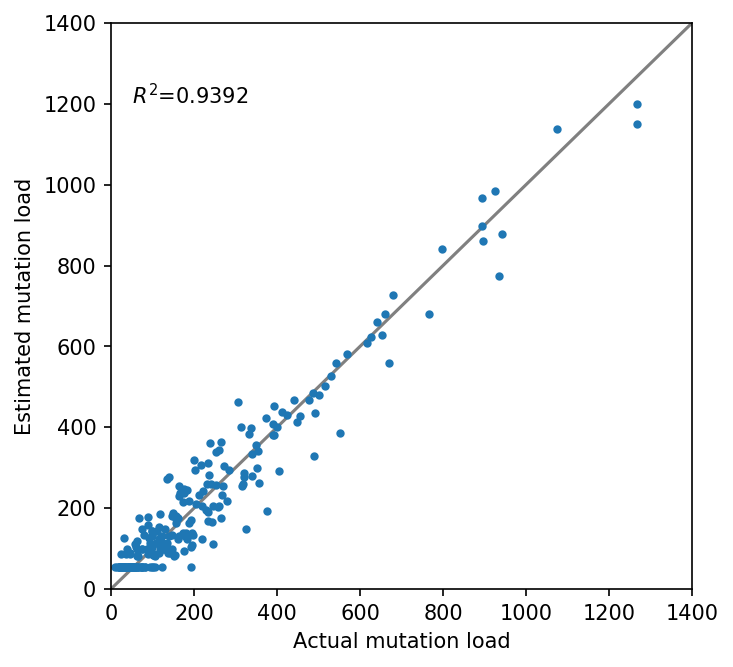

In [46]:
import matplotlib.pyplot as plt

# This corresponds to Fig.2 in the supplementary material (NOT Fig.2 in the paper)
fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
plt.plot([0, 1400], [0, 1400], linestyle='-', color='gray')
plt.plot(y, y_pred, '.')
ax.text(50, 1200, f"$R^2$={r2}")
plt.xlabel('Actual mutation load')
plt.ylabel('Estimated mutation load')
plt.axis([0, 1400, 0, 1400])

Notice when author applied the model back to the training data, the $R^2$ was 0.9336, similar to ours.

### Genes and the corresponding parameters (comparing to Table 1)

In [0]:
gene_idx = selector.get_support()
x_r = x[selected.index[gene_idx]]

In [48]:
estimator_r = LinearRegression()
estimator_r.fit(x_r, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
model_gene = []
print("Genes and parameters used in mutation load estimation model")
print("(Corresponding to Table 1 in the paper)")
for i in range(len(selected.index[gene_idx])):
    model_gene.append(selected.index[gene_idx][i])
    print(selected.index[gene_idx][i], ":", estimator_r.coef_[i])
print("Constant term:", estimator_r.intercept_)

Genes and parameters used in mutation load estimation model
(Corresponding to Table 1 in the paper)
FLG : 44.41154156375584
NALCN : 60.90230787890849
APOB : 28.13999179349754
ADAMTS12 : 34.65002460538795
LAMA2 : 72.99040721845877
COL11A1 : 34.02971122268593
HRNR : 31.280776511052512
ASTN1 : 32.12395449180556
ASPM : 49.27585225281265
GPR158 : 88.8200418043462
SORCS1 : 30.030592838268998
NAV3 : 33.31493273500458
CPS1 : 50.64340948315781
TSHZ2 : 44.063695177029985
CDH10 : 45.65185388993423
PXDNL : 57.36216309062247
SVEP1 : 34.684551818360994
MXRA5 : 45.3137890985515
FAM47C : 61.07645540239156
TAF1L : 41.070015094738
TPTE : 70.19728239744724
CSMD2 : 99.5025666600368
SORCS3 : 40.81652375530665
CNTNAP2 : 27.171732249953955
PRUNE2 : -33.00617499647322
Constant term: 54.12743698494222


In [50]:
print("Number of genes used in the model:", len(model_gene))

Number of genes used in the model: 25


# Predictiton of the mutation load


## Prepare validation data for model prediction
Important: make sure the x data for val183 and val34 have the same orders of features (genes) as x_r.

In [51]:
# use x_r.columns to reindex val183_model and val34_model
x_r

,FLG,NALCN,APOB,ADAMTS12,LAMA2,COL11A1,HRNR,ASTN1,ASPM,GPR158,SORCS1,NAV3,CPS1,TSHZ2,CDH10,PXDNL,SVEP1,MXRA5,FAM47C,TAF1L,TPTE,CSMD2,SORCS3,CNTNAP2,PRUNE2
TCGA-05-4249-01A-01D-1105-08,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-05-4382-01A-01D-1265-08,3.0,1.0,3.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-05-4384-01A-01D-1753-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
TCGA-05-4389-01A-01D-1265-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
TCGA-05-4390-01A-02D-1753-08,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-97-7554-01A-11D-2036-08,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-97-7937-01A-11D-2167-08,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
TCGA-97-7938-01A-11D-2167-08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-97-7941-01A-11D-2184-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
val183_model = val183_mutmtx[val183_mutmtx.index.isin(model_gene)]
val183_model = val183_model.reindex(x_r.columns)
val183_model = val183_model.transpose()
val183_model.head()

,FLG,NALCN,APOB,ADAMTS12,LAMA2,COL11A1,HRNR,ASTN1,ASPM,GPR158,SORCS1,NAV3,CPS1,TSHZ2,CDH10,PXDNL,SVEP1,MXRA5,FAM47C,TAF1L,TPTE,CSMD2,SORCS3,CNTNAP2,PRUNE2
LUAD-5O6B5-Tumor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LUAD-B00416-Tumor,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
LUAD-B00523-Tumor,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
LUAD-B00859-Tumor,0.0,2.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
LUAD-B00915-Tumor,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
val34_model = val34_mutmtx[val34_mutmtx.index.isin(model_gene)]
val34_model = val34_model.reindex(x_r.columns)
val34_model = val34_model.transpose()
val34_model.head()

,FLG,NALCN,APOB,ADAMTS12,LAMA2,COL11A1,HRNR,ASTN1,ASPM,GPR158,SORCS1,NAV3,CPS1,TSHZ2,CDH10,PXDNL,SVEP1,MXRA5,FAM47C,TAF1L,TPTE,CSMD2,SORCS3,CNTNAP2,PRUNE2
AL4602,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AU5884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BL3403,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA9903,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DI6359,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
val183_mut_load = val183_mutmtx.sum(axis=0)
val183_mut_load

LUAD-5O6B5-Tumor       31.0
LUAD-B00416-Tumor     746.0
LUAD-B00523-Tumor     409.0
LUAD-B00859-Tumor     272.0
LUAD-B00915-Tumor     425.0
                      ...  
LUAD-U6SJ7-Tumor      166.0
LU-A08-43-Tumor        54.0
LUAD-2GUGK-Tumor      231.0
LUAD-5V8LT-Tumor     1668.0
LUAD-E01317-Tumor     215.0
Length: 181, dtype: float64

In [55]:
val34_mut_load = val34_mutmtx.sum(axis=0)
val34_mut_load[:10]

AL4602      244.0
AU5884       34.0
BL3403      148.0
CA9903      324.0
DI6359      228.0
DM123062    134.0
GR0134       56.0
GR4788      170.0
HE3202      746.0
JB112852    190.0
dtype: float64

## Predict on concatenated validation data

It seems that the authors have combined the validation data first and then predicted on the combined data, so we will concatenate the validation data first before prediction.

In [56]:
# concatenate the matrix with model genes and patients
concat_model = pd.concat([val183_model, val34_model])
concat_model

,FLG,NALCN,APOB,ADAMTS12,LAMA2,COL11A1,HRNR,ASTN1,ASPM,GPR158,SORCS1,NAV3,CPS1,TSHZ2,CDH10,PXDNL,SVEP1,MXRA5,FAM47C,TAF1L,TPTE,CSMD2,SORCS3,CNTNAP2,PRUNE2
LUAD-5O6B5-Tumor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LUAD-B00416-Tumor,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
LUAD-B00523-Tumor,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
LUAD-B00859-Tumor,0.0,2.0,2.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
LUAD-B00915-Tumor,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VA1330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VA7859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WA7899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Y2087,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [0]:
# predict on concatenated validation data
concat_pred = estimator_r.predict(concat_model)

In [58]:
# concatenate the mutation load information
concat_mut_load = pd.concat([val183_mut_load, val34_mut_load])
concat_mut_load

LUAD-5O6B5-Tumor      31.0
LUAD-B00416-Tumor    746.0
LUAD-B00523-Tumor    409.0
LUAD-B00859-Tumor    272.0
LUAD-B00915-Tumor    425.0
                     ...  
VA1330                44.0
VA7859                11.0
WA7899               127.0
Y2087                507.0
ZA6505               378.0
Length: 211, dtype: float64

In [59]:
# this is the reported R^2 in fig.2(a)
concat_r2 = r2_score(concat_mut_load, concat_pred)
concat_r2

0.7026795078671826

In [60]:
val183_pred = concat_pred[:val183_model.shape[0]]
val183_pred.shape

(181,)

In [61]:
val34_pred = concat_pred[-val34_model.shape[0]:]
val34_pred.shape

(30,)

## Fig.2 (a)

[0, 3000, 0, 3000]

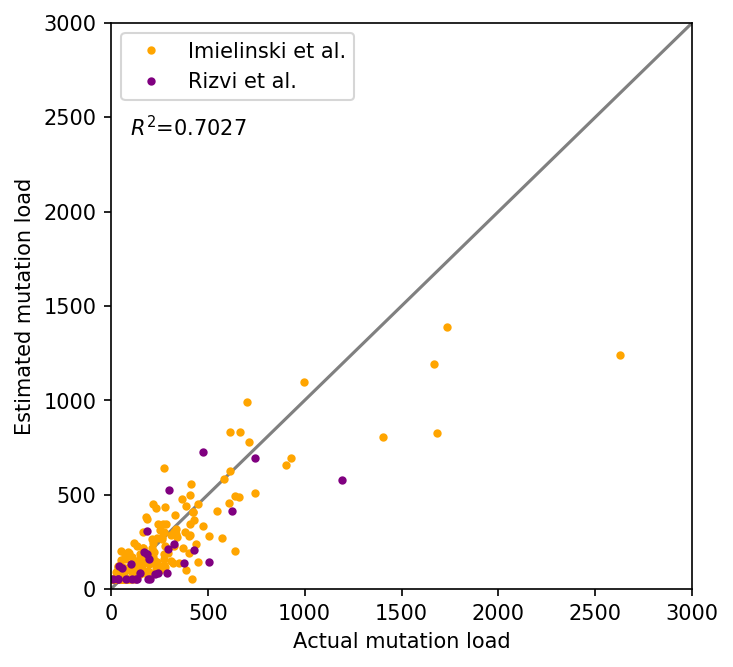

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
plt.plot([0, 3000], [0, 3000], linestyle='-', color='gray')
plt.plot(val183_mut_load, val183_pred, '.', color='orange', label='Imielinski et al.')
plt.plot(val34_mut_load, val34_pred, '.', color='purple', label='Rizvi et al.')
ax.text(100, 2400, f"$R^2$={round(concat_r2, 4)}")
plt.legend(loc='upper left')
plt.xlabel('Actual mutation load')
plt.ylabel('Estimated mutation load')
plt.axis([0, 3000, 0, 3000])

## Discussion

Our $R^2$ is slightly worse than the result from the paper. Our recursive feature elimination (RFE) method only elminates feature in one direction while the authors do this by forward selection and backward elimination going hand in hand. Therefore, the authors' method is more likely to be more robust but also more troublesome and computationally intensive.

# Prediction of immunotherapy treatment response

## Progression-free survial (Fig.2 (b))


In [0]:
# crease a dataframe to store info for pfs plot
val34_df = pd.DataFrame(val34_pred, index=val34_mutmtx.columns, columns=['MutLoad_Pred'])
val34_df['PFS'] = therapy['PFS (mos)']
val34_df['Event'] = therapy['Event']
val34_df = val34_df.sort_values(by=['MutLoad_Pred'])
val34_df = val34_df.dropna()

In [64]:
val34_df.reset_index()

,index,MutLoad_Pred,PFS,Event
0,AU5884,54.127437,1.833333,1
1,WA7899,54.127437,1.900000,1
2,DM123062,54.127437,1.900000,1
3,VA7859,54.127437,6.266667,1
4,RH090935,54.127437,10.433333,0
5,NI9507,54.127437,1.866667,1
6,JB112852,54.127437,3.266667,1
7,LO5004,54.127437,6.300000,1
8,LO3793,54.127437,3.500000,1
9,DI6359,82.267429,9.800000,0


In [85]:
# define high and low estimated mutation load
high_idx = val34_df.MutLoad_Pred>np.median(val34_df.MutLoad_Pred)

# The authors used log-rank test for this step (see Materials and Methods - Statistical analaysis)
from lifelines.statistics import logrank_test
sta_result = logrank_test(val34_df.PFS[high_idx], val34_df.PFS[~high_idx])
sta_result.p_value

0.011832712695402101

Text(0, 0.5, 'Progression-free survival (%)')

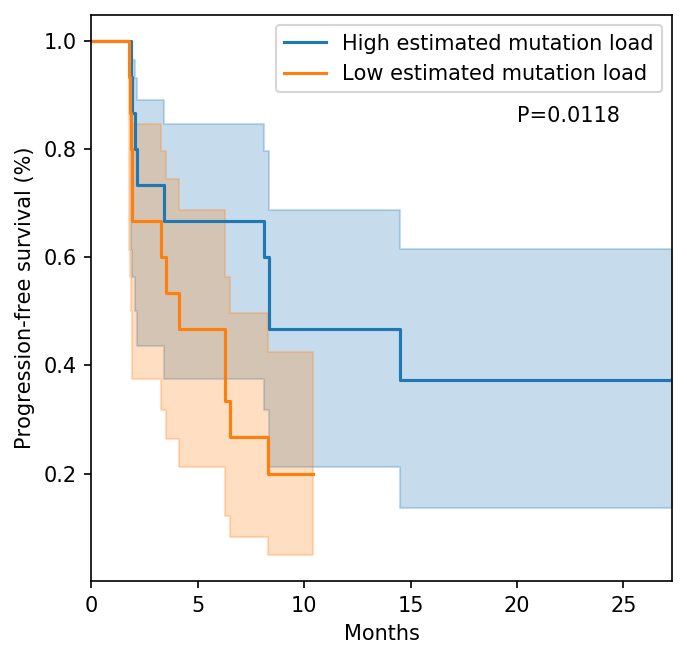

In [86]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
ax.text(20, 0.85, f"P={round(sta_result.p_value, 4)}")
kmf = KaplanMeierFitter()
kmf.fit(val34_df.PFS[high_idx], val34_df.Event[high_idx], label='High estimated mutation load')
kmf.plot(ax=ax)
kmf.fit(val34_df.PFS[~high_idx], val34_df.Event[~high_idx], label='Low estimated mutation load')
kmf.plot(ax=ax)
plt.xlabel('Months')
plt.ylabel('Progression-free survival (%)')

Our PFS plot looks similar to the authors'. The confidence interval of high estimated mutation load is wide, but it does not overlap too much with low estimated mutation load. The authors did not show confidence interval - theirs could be wide as well. 

## Cox proportional-hazards model
Compare Cox proportional-hazards between using acutual mutation load and mutation load predicted by our model.

In [67]:
# CoxPH summary based on predicted mutation load
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(val34_df, duration_col='PFS', event_col='Event')
cph_sum = cph.summary
cph_sum

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
MutLoad_Pred,-0.003311,0.996695,0.001724,-0.00669,0.000068,0.993333,1.000068,-1.920503,0.054794,4.189828


In [68]:
val34_true = val34_df.drop(['MutLoad_Pred'], axis=1)
val34_true['MutLoad'] = val34_mut_load
val34_true.head()

,PFS,Event,MutLoad
AU5884,1.833333,1,34.0
WA7899,1.900000,1,127.0
DM123062,1.900000,1,134.0
VA7859,6.266667,1,11.0
RH090935,10.433333,0,201.0


In [69]:
# CoxPH summary based on actual mutation load
cph_true = CoxPHFitter()
cph_true.fit(val34_true, duration_col='PFS', event_col='Event')
cph_true.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
MutLoad,-0.003968,0.99604,0.001688,-0.007276,-0.00066,0.99275,0.99934,-2.350971,0.018725,5.738928


## ROC curve (Fig.2(c))

ROC curve is used to determine the discrimination threshold of DCB (durable clinical benefit) and NDB (no durable benefit).

In [70]:
val34_roc = pd.DataFrame(val34_pred, index=val34_mutmtx.columns, columns=['MutLoad_Pred'])
val34_roc['MutLoad'] = val34_mut_load
val34_roc['DCB'] = therapy['Durable Clinical Benefit']
val34_roc.DCB[val34_roc.DCB=='NR'] = np.nan
val34_roc = val34_roc.dropna()
val34_roc['y_score'] = val34_roc.MutLoad_Pred/max(val34_roc.MutLoad_Pred)
val34_roc.DCB = val34_roc.DCB=='DCB'
val34_roc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,MutLoad_Pred,MutLoad,DCB,y_score
AL4602,85.408213,244.0,True,0.117641
AU5884,54.127437,34.0,False,0.074555
BL3403,85.408213,148.0,False,0.117641
CA9903,240.917464,324.0,True,0.331840
DI6359,82.267429,228.0,True,0.113315
DM123062,54.127437,134.0,False,0.074555
GR0134,111.489600,56.0,True,0.153566
GR4788,198.041545,170.0,False,0.272782
HE3202,692.219961,746.0,True,0.953464
JB112852,54.127437,190.0,False,0.074555


In [71]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(val34_roc.DCB, val34_roc.y_score)
np.c_[fpr, tpr, thresholds]

array([[0.        , 0.        , 2.        ],
       [0.        , 0.07142857, 1.        ],
       [0.        , 0.28571429, 0.72653675],
       [0.125     , 0.28571429, 0.42138076],
       [0.125     , 0.5       , 0.28306806],
       [0.1875    , 0.5       , 0.27278235],
       [0.1875    , 0.71428571, 0.1942753 ],
       [0.375     , 0.71428571, 0.17010409],
       [0.375     , 0.78571429, 0.15356573],
       [0.4375    , 0.78571429, 0.12044309],
       [0.5       , 0.85714286, 0.11764124],
       [0.5       , 0.92857143, 0.11331512],
       [1.        , 1.        , 0.07455511]])

[0, 1, 0, 1]

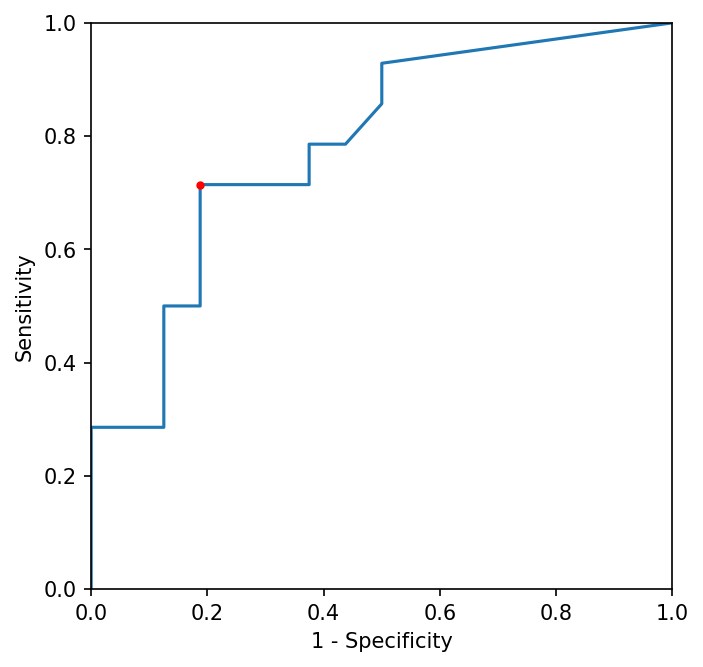

In [72]:
fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
plt.plot(fpr, tpr, '-')
plt.plot(0.1875, 0.71428571, '.', color='red')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.axis([0, 1, 0, 1])

Notice that, in Fig.2 (C), the threshold is reported to be 141, and the AUC=0.8744. Here, we will also calculate the threshold and AUC as follows.

In [73]:
# Select threshold based on ROC curve
threshold = 0.1875*max(val34_roc.MutLoad_Pred)
print("Optimal discrimination threshold:", threshold)

Optimal discrimination threshold: 136.1260728413052


In [74]:
from sklearn.metrics import roc_auc_score
print("AUC =", roc_auc_score(val34_roc.DCB, val34_roc.y_score))

AUC = 0.7834821428571428


The threshold and AUC are similar to the ones in the paper.

## Immunotherapy response prediction

In [75]:
val34_roc['DCB_pred'] = val34_roc.MutLoad_Pred>=threshold
val34_roc

,MutLoad_Pred,MutLoad,DCB,y_score,DCB_pred
AL4602,85.408213,244.0,True,0.117641,False
AU5884,54.127437,34.0,False,0.074555,False
BL3403,85.408213,148.0,False,0.117641,False
CA9903,240.917464,324.0,True,0.331840,True
DI6359,82.267429,228.0,True,0.113315,False
DM123062,54.127437,134.0,False,0.074555,False
GR0134,111.489600,56.0,True,0.153566,False
GR4788,198.041545,170.0,False,0.272782,True
HE3202,692.219961,746.0,True,0.953464,True
JB112852,54.127437,190.0,False,0.074555,False


In [0]:
#Classify all the patients into 4 categories: True Positive, False Positive, True Negative and False Negative.
TP = val34_roc.loc[(val34_roc['DCB'] == True) & (val34_roc['DCB_pred'] == True)] #True Positive
FP = val34_roc.loc[(val34_roc['DCB'] == False) & (val34_roc['DCB_pred'] == True)] #False Positive
TN = val34_roc.loc[(val34_roc['DCB'] == False) & (val34_roc['DCB_pred'] == False)] #True Negative
FN = val34_roc.loc[(val34_roc['DCB'] == True) & (val34_roc['DCB_pred'] == False)] #False Negative

[0, 1200, 0, 1200]

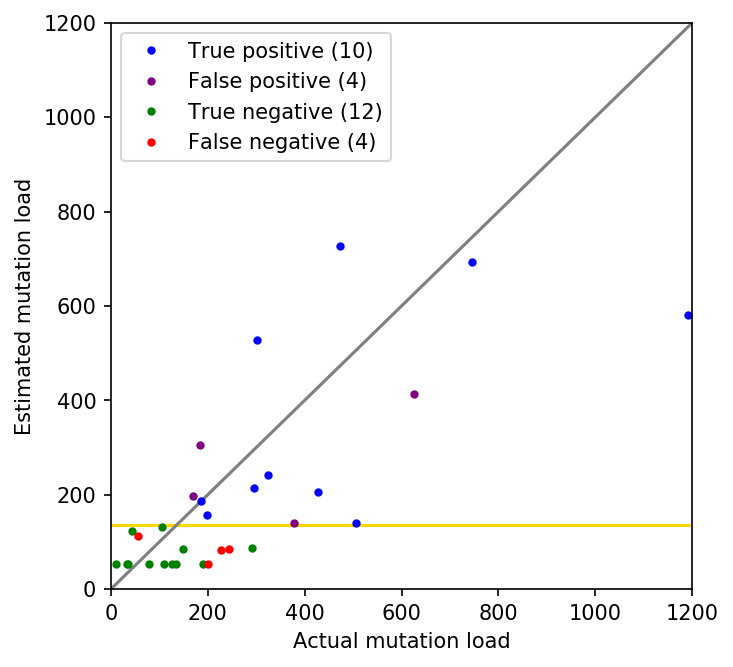

In [77]:
import matplotlib.pyplot as plt

# we make the figure large here to have better resolution in the report
# change the figure in proper size in the report
fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
plt.plot([0, 1200], [0, 1200], linestyle='-', color='gray')  #draw the diagonal

plt.plot(TP['MutLoad'], TP['MutLoad_Pred'], '.', color='blue', 
         label='True positive ({})'.format(str(TP.shape[0]))) 
plt.plot(FP['MutLoad'], FP['MutLoad_Pred'], '.', color='purple', 
         label='False positive ({})'.format(str(FP.shape[0])))
plt.plot(TN['MutLoad'], TN['MutLoad_Pred'], '.', color='green', 
         label='True negative ({})'.format(str(TN.shape[0])))
plt.plot(FN['MutLoad'], FN['MutLoad_Pred'], '.', color='red', 
         label='False negative ({})'.format(str(FN.shape[0])))

plt.hlines(threshold, 0, 1200, colors='gold', linestyles='solid') #draw the threshold line
plt.legend(loc='upper left')
plt.xlabel('Actual mutation load')
plt.ylabel('Estimated mutation load')
plt.axis([0, 1200, 0, 1200])

In [78]:
#calculate the sensitivity and specificity
sensitivity = TP.shape[0]/(TP.shape[0] + FN.shape[0]) #the ability to determine the DCB cases correctly.
sensitivity

specificity = TN.shape[0]/(TN.shape[0] + FP.shape[0]) #the ability to determine the NDB cases correctly.
specificity

accuracy = (TP.shape[0]+TN.shape[0])/(val34_roc.shape[0]) #the ability to differentiate the DCB and NDB correctly.
accuracy

print('The sensitivity, specificity, and accuracy of DCB/NDB classification using our constructed model were shown to be \n{}, {}, and {} respectively.'.format(
    round(sensitivity, 4), round(specificity, 4), round(accuracy, 4)))

The sensitivity, specificity, and accuracy of DCB/NDB classification using our constructed model were shown to be 
0.7143, 0.75, and 0.7333 respectively.


# Performance verification by random models

In [79]:
mutmtx_overlap = mutmtx[mutmtx.index.isin(val183_mutmtx.index) & 
                        mutmtx.index.isin(val34_mutmtx.index)]
mutmtx_overlap.head()

,TCGA-05-4249-01A-01D-1105-08,TCGA-05-4382-01A-01D-1265-08,TCGA-05-4384-01A-01D-1753-08,TCGA-05-4389-01A-01D-1265-08,TCGA-05-4390-01A-02D-1753-08,TCGA-05-4395-01A-01D-1265-08,TCGA-05-4396-01A-21D-1855-08,TCGA-05-4398-01A-01D-1265-08,TCGA-05-4402-01A-01D-1265-08,TCGA-05-4403-01A-01D-1265-08,TCGA-05-4405-01A-21D-1855-08,TCGA-05-4410-01A-21D-1855-08,TCGA-05-4415-01A-22D-1855-08,TCGA-05-4417-01A-22D-1855-08,TCGA-05-4418-01A-01D-1265-08,TCGA-05-4420-01A-01D-1265-08,TCGA-05-4422-01A-01D-1265-08,TCGA-05-4424-01A-22D-1855-08,TCGA-05-4425-01A-01D-1753-08,TCGA-05-4426-01A-01D-1265-08,TCGA-05-4430-01A-02D-1265-08,TCGA-05-4432-01A-01D-1265-08,TCGA-05-4433-01A-22D-1855-08,TCGA-05-5420-01A-01D-1625-08,TCGA-05-5423-01A-01D-1625-08,TCGA-05-5428-01A-01D-1625-08,TCGA-05-5429-01A-01D-1625-08,TCGA-05-5715-01A-01D-1625-08,TCGA-35-3615-01A-01D-1040-01,TCGA-38-4626-01A-01D-1553-08,TCGA-38-4627-01A-01D-1553-08,TCGA-38-4628-01A-01D-1265-08,TCGA-38-4631-01A-01D-1753-08,TCGA-38-4632-01A-01D-1753-08,TCGA-38-6178-01A-11D-1753-08,TCGA-44-2655-01A-01D-1553-08,TCGA-44-2656-01A-02W-0928-08,TCGA-44-2657-01A-01D-1105-08,TCGA-44-2659-01A-01D-0969-08,TCGA-44-2661-01A-01D-1105-08,TCGA-44-2662-01A-01D-0969-08,TCGA-44-2665-01A-01D-1040-01,TCGA-44-2666-01A-01D-1489-08,TCGA-44-3396-01A-01D-1265-08,TCGA-44-3919-01A-02D-1458-08,TCGA-44-4112-01A-01D-1105-08,TCGA-44-5645-01A-01D-1625-08,TCGA-44-6145-01A-11D-1753-08,TCGA-44-6146-01A-11D-1753-08,TCGA-44-6147-01A-11D-1753-08,TCGA-44-6774-01A-21D-1855-08,TCGA-44-6775-01A-11D-1855-08,TCGA-44-6776-01A-11D-1855-08,TCGA-44-6777-01A-11D-1855-08,TCGA-44-6779-01A-11D-1855-08,TCGA-44-7659-01A-11D-2063-08,TCGA-44-7662-01A-11D-2063-08,TCGA-44-7670-01A-11D-2063-08,TCGA-44-7671-01A-11D-2063-08,TCGA-44-7672-01A-11D-2063-08,TCGA-49-4486-01A-01D-1265-08,TCGA-49-4487-01A-21D-1855-08,TCGA-49-4488-01A-01D-1753-08,TCGA-49-4490-01A-21D-1855-08,TCGA-49-4494-01A-01D-1265-08,TCGA-49-4501-01A-01D-1265-08,TCGA-49-4505-01A-01D-1265-08,TCGA-49-4506-01A-01D-1265-08,TCGA-49-4507-01A-01D-1265-08,TCGA-49-4510-01A-01D-1265-08,TCGA-49-4512-01A-21D-1855-08,TCGA-49-4514-01A-21D-1855-08,TCGA-49-6742-01A-11D-1855-08,TCGA-49-6744-01A-11D-1855-08,TCGA-49-6745-01A-11D-1855-08,TCGA-49-6761-01A-31D-1945-08,TCGA-49-6767-01A-11D-1855-08,TCGA-50-5044-01A-21D-1855-08,TCGA-50-5049-01A-01D-1625-08,TCGA-50-5051-01A-21D-1855-08,TCGA-50-5055-01A-01D-1625-08,TCGA-50-5068-01A-01D-1625-08,TCGA-50-5072-01A-21D-1855-08,TCGA-50-5931-01A-11D-1753-08,TCGA-50-5932-01A-11D-1753-08,TCGA-50-5933-01A-11D-1753-08,TCGA-50-5935-01A-11D-1753-08,TCGA-50-5936-01A-11D-1625-08,TCGA-50-5939-01A-11D-1625-08,TCGA-50-5941-01A-11D-1753-08,TCGA-50-5942-01A-21D-1753-08,TCGA-50-5944-01A-11D-1753-08,TCGA-50-6593-01A-11D-1753-08,TCGA-50-6595-01A-12D-1855-08,TCGA-50-6597-01A-11D-1855-08,TCGA-50-6673-01A-11D-1945-08,TCGA-50-7109-01A-11D-2036-08,TCGA-53-7626-01A-12D-2063-08,TCGA-53-7813-01A-11D-2167-08,TCGA-55-1592-01A-01D-0969-08,TCGA-55-1594-01A-01D-1040-01,TCGA-55-1596-01A-01D-1040-01,TCGA-55-6543-01A-11D-1753-08,TCGA-55-6642-01A-11D-1855-08,TCGA-55-6712-01A-11D-1855-08,TCGA-55-6970-01A-11D-1945-08,TCGA-55-6971-01A-11D-1945-08,TCGA-55-6972-01A-11D-1945-08,TCGA-55-6978-01A-11D-1945-08,TCGA-55-6979-01A-11D-1945-08,TCGA-55-6980-01A-11D-1945-08,TCGA-55-6981-01A-11D-1945-08,TCGA-55-6982-01A-11D-1945-08,TCGA-55-6983-01A-11D-1945-08,TCGA-55-6985-01A-11D-1945-08,TCGA-55-6986-01A-11D-1945-08,TCGA-55-7281-01A-11D-2036-08,TCGA-55-7283-01A-11D-2036-08,TCGA-55-7573-01A-11D-2036-08,TCGA-55-7574-01A-11D-2036-08,TCGA-55-7576-01A-11D-2063-08,TCGA-55-7724-01A-11D-2167-08,TCGA-55-7725-01A-11D-2167-08,TCGA-55-7726-01A-11D-2167-08,TCGA-55-7727-01A-11D-2167-08,TCGA-55-7728-01A-11D-2184-08,TCGA-55-7815-01A-11D-2167-08,TCGA-55-7903-01A-11D-2167-08,TCGA-55-7907-01A-11D-2167-08,TCGA-55-7911-01A-11D-2167-08,TCGA-55-7914-01A-11D-2167-08,TCGA-64-1676-01A-01D-0969-08,TCGA-64-1677-01A-01W-0928-08,TCGA-64-1678-01A-01W-0928-08,TCGA-64-1679-01A-21D-2063-08,TCGA-64-1680-01A-02D-0969-08,TCGA-64-1681-01A-11D-2063-08,TCGA-64-5774-01A-01D-1625-

In [80]:
val_mutmtx = pd.concat([
    val183_mutmtx[val183_mutmtx.index.isin(mutmtx_overlap.index)].reindex(mutmtx_overlap.index), 
    val34_mutmtx[val34_mutmtx.index.isin(mutmtx_overlap.index)].reindex(mutmtx_overlap.index)], axis=1)

print(val_mutmtx.shape)
val_mutmtx.head()

(3668, 211)


,LUAD-5O6B5-Tumor,LUAD-B00416-Tumor,LUAD-B00523-Tumor,LUAD-B00859-Tumor,LUAD-B00915-Tumor,LUAD-B01102-Tumor,LUAD-B01145-Tumor,LUAD-B01169-Tumor,LUAD-B01811-Tumor,LUAD-B02077-Tumor,LUAD-B02216-Tumor,LUAD-B02477-Tumor,LUAD-B02515-Tumor,LUAD-B02594-Tumor,LUAD-D01382-Tumor,LUAD-D01603-Tumor,LUAD-D01751-Tumor,LUAD-D02185-Tumor,LUAD-E00163-Tumor,LUAD-F00018-Tumor,LUAD-F00057-Tumor,LUAD-F00089-Tumor,LUAD-F00134-Tumor,LUAD-F00257-Tumor,LUAD-F00365-Tumor,LUAD-F00368-Tumor,LUAD-GU4I3-Tumor,LUAD-LC15C-Tumor,LUAD-LIP77-Tumor,LUAD-QJN9L-Tumor,LUAD-S00484-Tumor,LUAD-S00486-Tumor,LUAD-S01306-Tumor,LUAD-S01315-Tumor,LUAD-S01320-Tumor,LUAD-S01362-Tumor,LUAD-S01409-Tumor,LUAD-S01413-Tumor,LUAD-S01482-Tumor,LUAD-TLLGS-Tumor,LUAD-UF7HM-Tumor,LUAD-VUMN6-Tumor,LUAD-YINHD-Tumor,LUAD-YKER9-Tumor,LUAD_E00522-Tumor,LUAD_E00623-Tumor,LUAD_E01086-Tumor,LUAD_E01419-Tumor,LUAD-74TBW-Tumor,LUAD-B01970-Tumor,LUAD-CHTN-3090346-Tumor,LUAD-CHTN-3090415-Tumor,LUAD-CHTN-3090416-Tumor,LUAD-CHTN-4090680-Tumor,LUAD-CHTN-MAD04-00674-Tumor,LUAD-CHTN-MAD06-00490-Tumor,LUAD-CHTN-MAD06-00668-Tumor,LUAD-CHTN-MAD06-00678-Tumor,LUAD-CHTN-MAD08-00104-Tumor,LUAD-CHTN-Z4716A-Tumor,LUAD-D00147-Tumor,LUAD-D01278-Tumor,LUAD-D02085-Tumor,LUAD-E00443-Tumor,LUAD-E00897-Tumor,LUAD-E00918-Tumor,LUAD-F00121-Tumor,LUAD-F00162-Tumor,LUAD-F00170-Tumor,LUAD-F00282-Tumor,LUAD-NYU1021-Tumor,LUAD-NYU1026-Tumor,LUAD-NYU1027-Tumor,LUAD-NYU1051S-Tumor,LUAD-NYU1093-Tumor,LUAD-NYU1096-Tumor,LUAD-NYU1101-Tumor,LUAD-NYU1124-Tumor,LUAD-NYU1128-Tumor,LUAD-NYU1142-Tumor,LUAD-NYU1177-Tumor,LUAD-NYU1195-Tumor,LUAD-NYU1210-Tumor,LUAD-NYU1219-Tumor,LUAD-NYU129-Tumor,LUAD-NYU160-Tumor,LUAD-NYU184-Tumor,LUAD-NYU195-Tumor,LUAD-NYU201-Tumor,LUAD-NYU213-Tumor,LUAD-NYU252-Tumor,LUAD-NYU259-Tumor,LUAD-NYU263-Tumor,LUAD-NYU282-Tumor,LUAD-NYU284-Tumor,LUAD-NYU287-Tumor,LUAD-NYU315-Tumor,LUAD-NYU330-Tumor,LUAD-NYU408-Tumor,LUAD-NYU508-Tumor,LUAD-NYU574S-Tumor,LUAD-NYU575-Tumor,LUAD-NYU584S-Tumor,LUAD-NYU605-Tumor,LUAD-NYU608-Tumor,LUAD-NYU627-Tumor,LUAD-NYU669-Tumor,LUAD-NYU689-Tumor,LUAD-NYU696-Tumor,LUAD-NYU704-Tumor,LUAD-NYU735-Tumor,LUAD-NYU739-Tumor,LUAD-NYU796-Tumor,LUAD-NYU802-Tumor,LUAD-NYU803-Tumor,LUAD-NYU846-Tumor,LUAD-NYU847-Tumor,LUAD-NYU848-Tumor,LUAD-NYU947-Tumor,LUAD-NYU994-Tumor,LUAD-QCHM7-Tumor,LUAD-RT-S01477-Tumor,LUAD-RT-S01487-Tumor,LUAD-RT-S01699-Tumor,LUAD-RT-S01700-Tumor,LUAD-RT-S01702-Tumor,LUAD-RT-S01703-Tumor,LUAD-RT-S01709-Tumor,LUAD-RT-S01711-Tumor,LUAD-RT-S01721-Tumor,LUAD-RT-S01769-Tumor,LUAD-RT-S01770-Tumor,LUAD-RT-S01771-Tumor,LUAD-RT-S01774-Tumor,LUAD-RT-S01777-Tumor,LUAD-RT-S01808-Tumor,LUAD-RT-S01810-Tumor,LUAD-RT-S01813-Tumor,LUAD-RT-S01818-Tumor,LUAD-RT-S01831-Tumor,LUAD-RT-S01832-Tumor,LUAD-RT-S01840-Tumor,LUAD-RT-S01852-Tumor,LUAD-RT-S01856-Tumor,LUAD-RT-S01866-Tumor,LUAD-S00499-Tumor,LUAD-S01304-Tumor,LUAD-S01354-Tumor,LUAD-S01357-Tumor,LUAD-S01373-Tumor,LUAD_E00565-Tumor,LUAD_E00703-Tumor,LUAD_E00945-Tumor,LUAD_E01047-Tumor,LUAD_E01147-Tumor,LUAD_E01166-Tumor,LUAD_E01319-Tumor,LUAD-AEIUF-Tumor,LUAD-D02326-Tumor,LUAD-E00934-Tumor,LUAD-E01014-Tumor,LUAD-E01278-Tumor,LUAD-FH5PJ-Tumor,LUAD-QY22Z-Tumor,LUAD-S00488-Tumor,LUAD-S01302-Tumor,LUAD-S01331-Tumor,LUAD-S01341-Tumor,LUAD-S01345-Tumor,LUAD-S01346-Tumor,LUAD-S01356-Tumor,LUAD-S01381-Tumor,LUAD-S01404-Tumor,LUAD-S01405-Tumor,LUAD-S01467-Tumor,LUAD-S01478-Tumor,LUAD-U6SJ7-Tumor,LU-A08-43-Tumor,LUAD-2GUGK-Tumor,LUAD-5V8LT-Tumor,LUAD-E01317-Tumor,AL4602,AU5884,BL3403,CA9903,DI6359,DM123062,GR0134,GR4788,HE3202,JB112852,KA3947,LO3793,LO5004,M4945,MA7027,NI9507,RH090935,RI1933,RO3338,SA9755,SB010944,SC0899,SC6470,SR070761,TU0428,VA1330,VA7859,WA7899,Y2087,ZA6505
PLEKHN1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [0]:
y = mut_load.transpose()
val_mut_load = pd.concat([val183_mut_load, val34_mut_load])

n = 10000 # number of random models
m = len(model_gene)
null_r2 = np.zeros(n)

np.random.seed(1)
i = 0
while (i < n):
    j = np.random.permutation(mutmtx_overlap.shape[0])[:m]
    null_x = mutmtx_overlap.iloc[j, :].transpose()
    val_null_x = val_mutmtx.iloc[j, :].transpose()

    estimator_null = LinearRegression()
    estimator_null.fit(null_x, y)

    null_r2[i] = r2_score(val_mut_load, estimator_null.predict(val_null_x))
    if abs(null_r2[i]) <= 1: # get valid r2
        i += 1

In [82]:
from scipy.stats import norm

z_sta = (concat_r2 - np.mean(null_r2)) / np.std(null_r2)
p_r2 = norm.sf(abs(z_sta))
p_r2

0.008328524271738672

Text(0, 0.5, 'Number of random models')

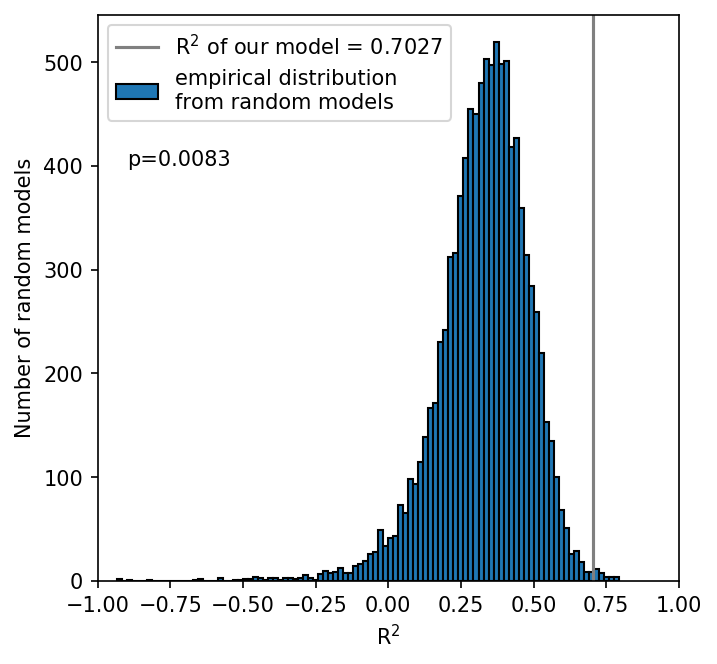

In [83]:
fig, ax = plt.subplots(dpi=150, figsize=(5, 5))
plt.hist(null_r2, bins=100, edgecolor='black',
         label='empirical distribution \nfrom random models')
plt.axvline(x=concat_r2, color='gray',
            label=r'R$^2$ of our model = %.4f'%concat_r2)
plt.xlim(-1, 1)
ax.text(-0.9, 400, f"p={round(p_r2, 4)}")
plt.legend(loc='upper left')
plt.xlabel('R$^2$')
plt.ylabel('Number of random models')